In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df_volt = pd.read_csv('../volt.csv')
df_volt

,analog,multimeter
0,18,0.500
1,28,0.749
2,39,0.999
3,49,1.249
4,59,1.500
...,...,...
78,819,20.000
79,860,21.000
80,902,22.000
81,942,23.000


coefficient of determination: 0.9999927887374964
intercept: 0.06449091372411075
slope: [0.024386]
0.06449091372411075 + 0.024386004366555764 * analog


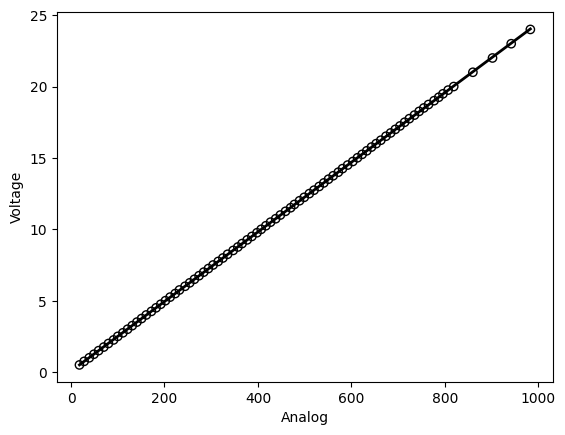

In [4]:
x_voltage = df_volt["analog"].to_numpy().reshape((-1, 1))
y_voltage = df_volt["multimeter"].to_numpy()
model = LinearRegression()
model.fit(x_voltage, y_voltage)
model = LinearRegression().fit(x_voltage, y_voltage)
r_sq = model.score(x_voltage, y_voltage)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred_voltage = model.intercept_ + model.coef_ * x_voltage
print(f"{model.intercept_} + {model.coef_[0]} * analog")
plt.scatter(x_voltage, y_voltage, facecolors='none', edgecolors='k')
plt.xlabel('Analog')
plt.ylabel('Voltage')
plt.plot(x_voltage, y_pred_voltage, color='k', linewidth=2)
plt.savefig('../docs 2nd Approach/img/regression_voltage.png')
# plt.xlim(0, 4095)
# plt.ylim(0,25)
plt.show()



In [5]:
import statsmodels.formula.api as smf
model = smf.ols('analog ~ multimeter', data = df_volt)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 analog   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.123e+07
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          4.96e-210
Time:                        20:55:23   Log-Likelihood:                -85.483
No. Observations:                  83   AIC:                             175.0
Df Residuals:                      81   BIC:                             179.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6414      0.153    -17.317      0.0